### Import Library

In [ ]:
# in anaconda prompt install
# pip install pydotplus
# pip install graphviz

In [1]:
import numpy as np # arrays
import pandas as pd # dataframes

from sklearn.model_selection import train_test_split # Train/Test Split

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics # evaluation

import matplotlib.pyplot as plt #visualisation

# show the decision tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### Import Data

In [3]:
data_000 = pd.read_csv('Stations_VenueCounts_Clustered.csv', index_col = 0)
data_000.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Blair,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0,2
Cyrville,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0,2
St-Laurent,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0,5
Tremblay,2.0,1.0,20.0,0.0,5.0,16.0,25.0,30.0,4
Hurdman,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0,4


### Assign

Define feature set X

In [6]:
X = data_000[['Arts & Entertainment'
                                   , 'College & University'
                                   , 'Food'
                                   , 'Nightlife Spot'
                                   , 'Outdoors & Recreation'
                                   , 'Professional & Other Places'
                                   , 'Shop & Service'
                                   , 'Travel & Transport'
                                  ]].values

Define labels for the feature set

In [7]:
Y = data_000['Cluster'].values

### Train / Test Split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size = 0.2, 
    random_state=3)

print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (20, 9) (20,)
Test set: (6, 9) (6,)


### Decision Trees

Create an Instance

In [8]:
Stations_Tree = DecisionTreeClassifier(criterion="entropy",
                                      max_depth = 4)
Stations_Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Training

In [9]:
Stations_Tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predicting

In [9]:
Predict_Tree = Stations_Tree.predict(X_test)

print(Predict_Tree[0:5])
print(Y_test[0:5])

[5 4 0 5 7]
[5 4 1 3 0]


Evaluation

In [10]:
print("DecisionTree's Accuracy: ", metrics.accuracy_score(Y_test, Predict_Tree))

DecisionTree's Accuracy:  0.5


Visualise Decision Tree

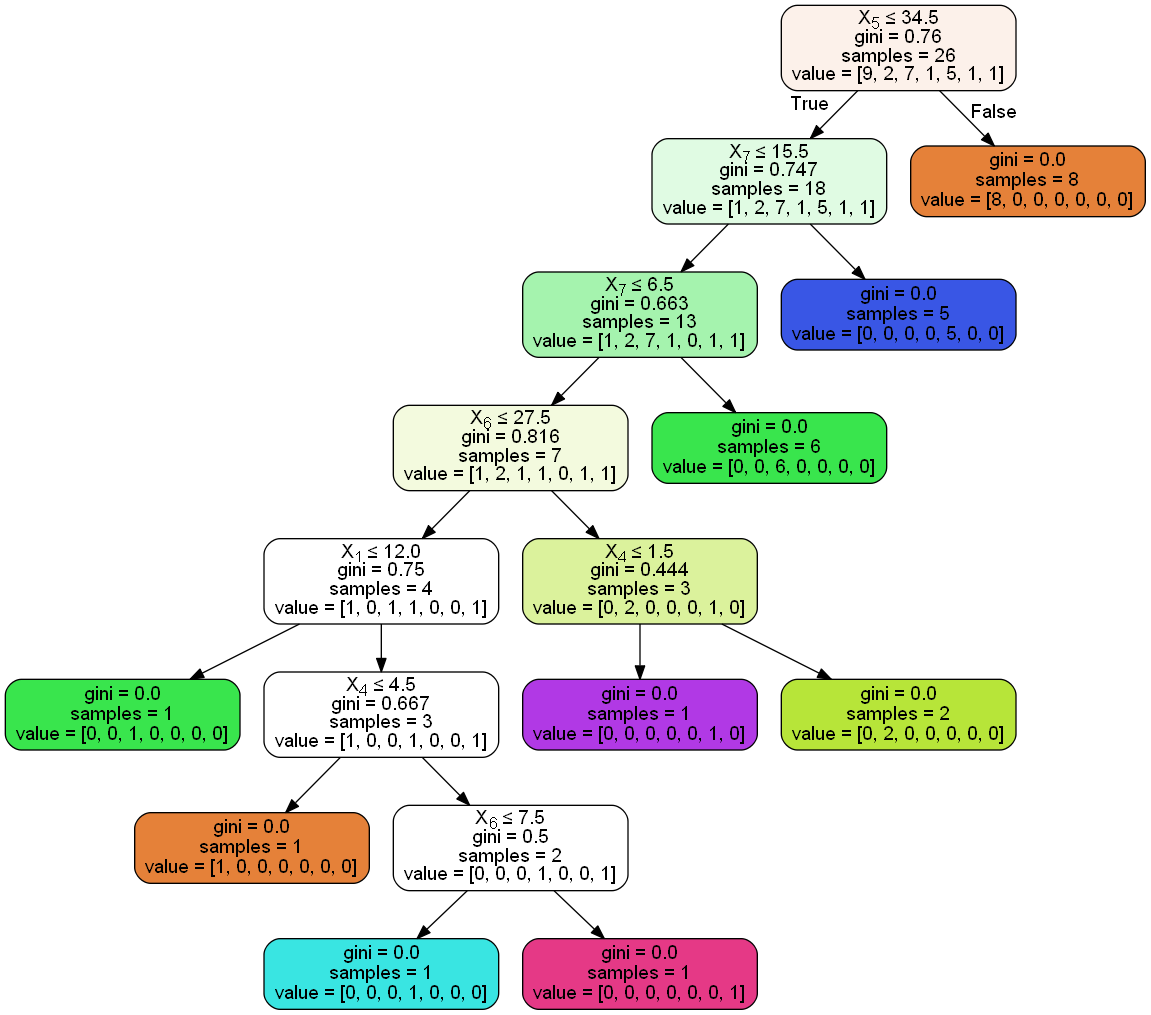

In [11]:
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [10]:
dtree = DecisionTreeClassifier()
dtree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')